<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/CatsvsDogs_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                         Diabetes Dataset                                      9KB  2022-10-06 08:55:25            765         23  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset           COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11            706         21  0.9411765        
evangower/premier-league-matches-19922022                     Premier League Matches 1992-2022                     78KB  2022-10-03 02:18:33            506         23  1.0              
whenamancodes/student-performance                             Student 

In [7]:
! kaggle competitions download -c 'dogs-vs-cats'

100% 812M/812M [00:03<00:00, 283MB/s]
100% 812M/812M [00:03<00:00, 263MB/s]


In [8]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [9]:
! mkdir dataset && unzip train.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/dog.5499.jpg  
  inflating: dataset/train/dog.55.jpg  
  inflating: dataset/train/dog.550.jpg  
  inflating: dataset/train/dog.5500.jpg  
  inflating: dataset/train/dog.5501.jpg  
  inflating: dataset/train/dog.5502.jpg  
  inflating: dataset/train/dog.5503.jpg  
  inflating: dataset/train/dog.5504.jpg  
  inflating: dataset/train/dog.5505.jpg  
  inflating: dataset/train/dog.5506.jpg  
  inflating: dataset/train/dog.5507.jpg  
  inflating: dataset/train/dog.5508.jpg  
  inflating: dataset/train/dog.5509.jpg  
  inflating: dataset/train/dog.551.jpg  
  inflating: dataset/train/dog.5510.jpg  
  inflating: dataset/train/dog.5511.jpg  
  inflating: dataset/train/dog.5512.jpg  
  inflating: dataset/train/dog.5513.jpg  
  inflating: dataset/train/dog.5514.jpg  
  inflating: dataset/train/dog.5515.jpg  
  inflating: dataset/train/dog.5516.jpg  
  inflating: dataset/train/dog.5517.jpg  
  inflating: dataset/train/do

In [10]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random, os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
def copy_images_to_directory(src_dir, target_dir, classes):
    print(f"Source Dir: {src_dir} \n Target Dir: {target_dir} \n")
    if os.path.exists(f"{target_dir}/{classes[0]}") and len(os.listdir(f"{target_dir}/{classes[0]}")) != 0:
        return
    else:
        if not os.path.exists(target_dir):
          os.mkdir(target_dir)
        if not os.path.exists(f"{target_dir}/{classes[0]}"):
            for val in classes:
                os.mkdir(f"{target_dir}/{val}")
                print(f"Directory Created {target_dir}/{val} \n")

        if len(os.listdir(f"{target_dir}/{classes[0]}")) == 0:
            for file_name in os.listdir(src_dir):
                for val in classes:
                    if val in file_name:
                        shutil.copy(f"{src_dir}/{file_name}", f"{target_dir}/{val}/")
                        print(f"File {file_name}- copied to {target_dir}/{val}")
    return

In [12]:
copy_images_to_directory("/content/dataset/new_train", "/content/dataset/train", ["cat", "dog"])

Streaming output truncated to the last 5000 lines.
File cat.9525.jpg- copied to /content/dataset/train/cat
File dog.10296.jpg- copied to /content/dataset/train/dog
File cat.6859.jpg- copied to /content/dataset/train/cat
File cat.8865.jpg- copied to /content/dataset/train/cat
File cat.9694.jpg- copied to /content/dataset/train/cat
File cat.11636.jpg- copied to /content/dataset/train/cat
File dog.9499.jpg- copied to /content/dataset/train/dog
File cat.1597.jpg- copied to /content/dataset/train/cat
File cat.11249.jpg- copied to /content/dataset/train/cat
File dog.4515.jpg- copied to /content/dataset/train/dog
File dog.8669.jpg- copied to /content/dataset/train/dog
File cat.6643.jpg- copied to /content/dataset/train/cat
File cat.3975.jpg- copied to /content/dataset/train/cat
File dog.3676.jpg- copied to /content/dataset/train/dog
File dog.11291.jpg- copied to /content/dataset/train/dog
File dog.4209.jpg- copied to /content/dataset/train/dog
File cat.8716.jpg- copied to /content/dataset/tra

In [13]:
def randomly_copy_data_to_test(src_dir, classes, split_size):
    test_dir = os.path.dirname(src_dir) + "/test"
    if not os.path.exists(test_dir):
        os.mkdir(test_dir)
        for val in classes:
            os.mkdir(f"{test_dir}/{val}")
            print(f"Directory Created {test_dir}/{val} \n")

    for val in classes:
        if len(os.listdir(f"{test_dir}/{val}")) == 0:
            file_list = os.listdir(f"{src_dir}/{val}")
            file_len = int(float(len(file_list)) * split_size)
            print(file_len)
            lines = random.sample(file_list, file_len)
            print(len(lines))
            for file in lines:
                shutil.move(f"{src_dir}/{val}/{file}", f"{test_dir}/{val}")

In [14]:
randomly_copy_data_to_test("/content/dataset/train", ["cat", "dog"], split_size=0.3)

Directory Created /content/dataset/test/cat 

Directory Created /content/dataset/test/dog 

3750
3750
3750
3750


In [15]:
def randomly_display_images_from_dir(src_dir, number_of_imgs):
    file_list = os.listdir(src_dir)
    len_of_dir = len(file_list)

    for _ in range(number_of_imgs):
        randomnum = random.randint(0, len_of_dir)
        img = mpimg.imread(f"{src_dir}/{file_list[randomnum]}")
        plt.imshow(img)
        plt.show()

In [16]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'
classes = ['cat', 'dog']

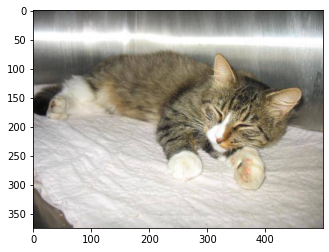

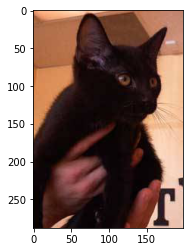

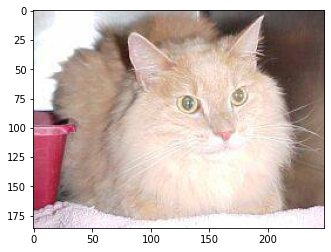

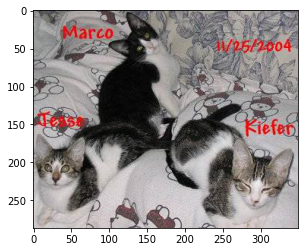

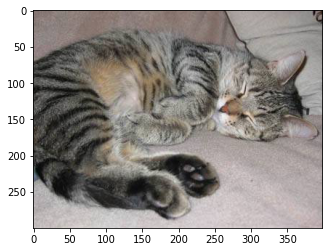

In [17]:
randomly_display_images_from_dir(f"{train_dir}/{classes[0]}", 5)

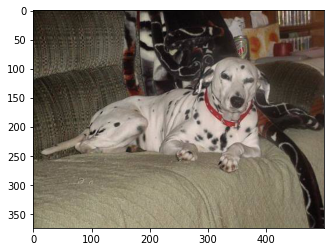

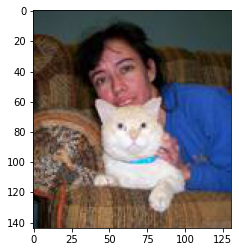

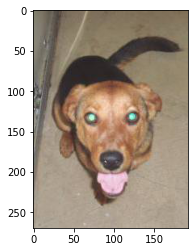

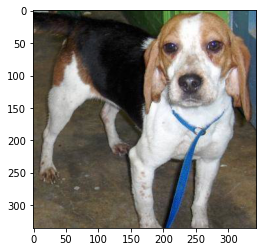

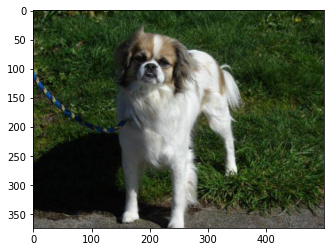

In [18]:
randomly_display_images_from_dir(f"{train_dir}/{classes[1]}", 5)

In [19]:
path = train_dir + "/" + classes[0]
print(f"Train Size: {len(os.listdir(path))}")
path = test_dir + "/" + classes[0]
print(f"Test Size: {len(os.listdir(path))}")

Train Size: 8750
Test Size: 3750


In [20]:
# TF Set random seed
tf.random.set_seed(42)

# Pre process data and Normalization
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed = 42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name= "Small_vgg_model_1")

# Compile Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=(valid_data),
                        validation_steps=len(valid_data))

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.
Epoch 1/5
547/547 [==============================] - 94s 153ms/step - loss: 0.6161 - accuracy: 0.6402 - val_loss: 0.5602 - val_accuracy: 0.7153
Epoch 2/5
547/547 [==============================] - 83s 152ms/step - loss: 0.5144 - accuracy: 0.7467 - val_loss: 0.5389 - val_accuracy: 0.7357
Epoch 3/5
547/547 [==============================] - 83s 152ms/step - loss: 0.4560 - accuracy: 0.7835 - val_loss: 0.5303 - val_accuracy: 0.7491
Epoch 4/5
547/547 [==============================] - 83s 151ms/step - loss: 0.4120 - accuracy: 0.8066 - val_loss: 0.4984 - val_accuracy: 0.7627
Epoch 5/5
547/547 [==============================] - 83s 151ms/step - loss: 0.3566 - accuracy: 0.8402 - val_loss: 0.5650 - val_accuracy: 0.7441


In [21]:
# Evaluate the model
model_1.evaluate(valid_data)

235/235 [==============================] - 28s 117ms/step - loss: 0.5650 - accuracy: 0.7441


[0.5650449991226196, 0.7441333532333374]

In [23]:
# Model 2 with more number of epochs
# Build a CNN model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name= "Small_vgg_model_2")

# Compile Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=(valid_data),
                        validation_steps=len(valid_data))

Epoch 1/10
547/547 [==============================] - 85s 154ms/step - loss: 0.6147 - accuracy: 0.6505 - val_loss: 0.5498 - val_accuracy: 0.7175
Epoch 2/10
547/547 [==============================] - 82s 150ms/step - loss: 0.5247 - accuracy: 0.7388 - val_loss: 0.5216 - val_accuracy: 0.7417
Epoch 3/10
547/547 [==============================] - 82s 150ms/step - loss: 0.4782 - accuracy: 0.7722 - val_loss: 0.4930 - val_accuracy: 0.7632
Epoch 4/10
547/547 [==============================] - 82s 151ms/step - loss: 0.4257 - accuracy: 0.8034 - val_loss: 0.5023 - val_accuracy: 0.7592
Epoch 5/10
547/547 [==============================] - 83s 152ms/step - loss: 0.3741 - accuracy: 0.8311 - val_loss: 0.5269 - val_accuracy: 0.7584
Epoch 6/10
547/547 [==============================] - 83s 152ms/step - loss: 0.3239 - accuracy: 0.8586 - val_loss: 0.5433 - val_accuracy: 0.7581
Epoch 7/10
547/547 [==============================] - 83s 152ms/step - loss: 0.2684 - accuracy: 0.8833 - val_loss: 0.6633 - val_ac

In [24]:
model_2.evaluate(valid_data)

235/235 [==============================] - 24s 103ms/step - loss: 0.9589 - accuracy: 0.7395


[0.9588711857795715, 0.739466667175293]

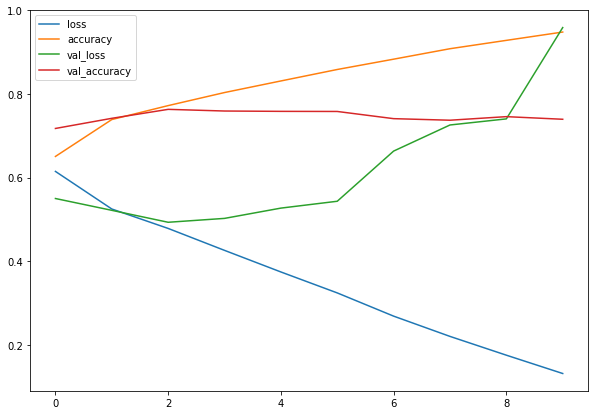

In [26]:
# Plot loss curves
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [27]:
def plot_loss_curves(history):
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))
    plt.figure()
    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title('Loss')
    plt.xlabel('Loss')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure()
    plt.plot(epochs, acc, label="Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.title('Accuracy')
    plt.xlabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

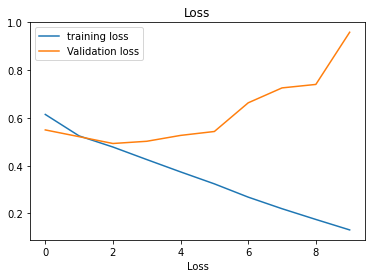

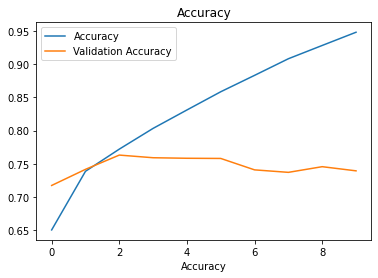

In [29]:
plot_loss_curves(history_2)

In [32]:
# Model 2 with more number of epochs
# Build a CNN model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name= "Small_vgg_model_3")

# Compile Model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=(valid_data),
                        validation_steps=len(valid_data))

Epoch 1/15
547/547 [==============================] - 84s 152ms/step - loss: 0.6012 - accuracy: 0.6638 - val_loss: 0.5764 - val_accuracy: 0.6933
Epoch 2/15
547/547 [==============================] - 77s 142ms/step - loss: 0.5202 - accuracy: 0.7401 - val_loss: 0.5329 - val_accuracy: 0.7347
Epoch 3/15
547/547 [==============================] - 77s 141ms/step - loss: 0.4859 - accuracy: 0.7654 - val_loss: 0.5124 - val_accuracy: 0.7476
Epoch 4/15
547/547 [==============================] - 78s 142ms/step - loss: 0.4573 - accuracy: 0.7832 - val_loss: 0.5070 - val_accuracy: 0.7620
Epoch 5/15
547/547 [==============================] - 78s 142ms/step - loss: 0.4357 - accuracy: 0.7989 - val_loss: 0.4799 - val_accuracy: 0.7773
Epoch 6/15
547/547 [==============================] - 78s 142ms/step - loss: 0.4175 - accuracy: 0.8068 - val_loss: 0.4799 - val_accuracy: 0.7732
Epoch 7/15
547/547 [==============================] - 78s 142ms/step - loss: 0.3998 - accuracy: 0.8175 - val_loss: 0.4835 - val_ac

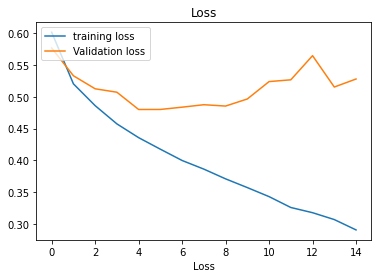

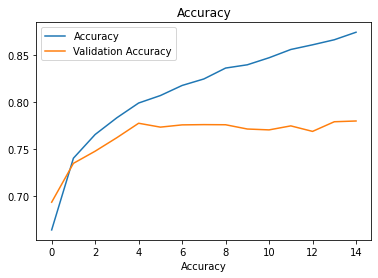

In [33]:
plot_loss_curves(history_3)

In [36]:
# Using Data Augmentation to reduce overfitting
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                          rotation_range=0.2, 
                                          shear_range=0.2, 
                                          zoom_range=0.2, 
                                          width_shift_range =0.2,
                                          height_shift_range = 0.2,
                                          horizontal_flip = True)

In [44]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 244),
                                                                   batch_size =32,
                                                                   class_mode="binary",
                                                                   seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed = 42)

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [49]:
# Fit the model using Augmented Data
# Model 2 with more number of epochs
# Build a CNN model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(20, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name= "Small_vgg_model_4")

# Compile Model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs= 10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=(valid_data),
                        validation_steps=len(valid_data))

Epoch 1/10
547/547 [==============================] - 82s 149ms/step - loss: 0.6672 - accuracy: 0.5826 - val_loss: 0.6123 - val_accuracy: 0.6609
Epoch 2/10
547/547 [==============================] - 81s 148ms/step - loss: 0.5826 - accuracy: 0.6919 - val_loss: 0.5486 - val_accuracy: 0.7092
Epoch 3/10
547/547 [==============================] - 81s 147ms/step - loss: 0.5251 - accuracy: 0.7383 - val_loss: 0.4998 - val_accuracy: 0.7551
Epoch 4/10
547/547 [==============================] - 99s 181ms/step - loss: 0.4813 - accuracy: 0.7696 - val_loss: 0.4791 - val_accuracy: 0.7696
Epoch 5/10
547/547 [==============================] - 80s 146ms/step - loss: 0.4503 - accuracy: 0.7875 - val_loss: 0.4911 - val_accuracy: 0.7747
Epoch 6/10
547/547 [==============================] - 80s 146ms/step - loss: 0.4113 - accuracy: 0.8113 - val_loss: 0.4568 - val_accuracy: 0.7881
Epoch 7/10
547/547 [==============================] - 80s 146ms/step - loss: 0.3819 - accuracy: 0.8273 - val_loss: 0.4728 - val_ac

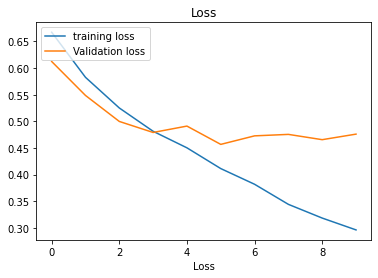

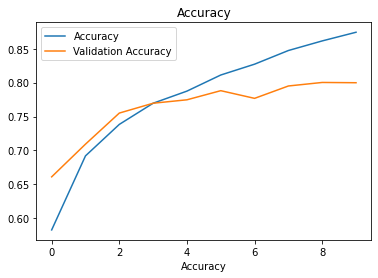

In [50]:
plot_loss_curves(history_4)